In [27]:
#Import required packages here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
!pip install pingouin
import pingouin as pg

In [28]:
# Load the data set
df_mri = pd.read_csv('INF2178_A4_data.csv')
df_mri

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,366,OAS2_0184,OAS2_0184_MR2,Demented,2,553,F,R,73,16,3.0,21.0,1.0,1351,0.708,1.299
290,367,OAS2_0185,OAS2_0185_MR1,Demented,1,0,M,R,80,16,1.0,28.0,0.5,1704,0.711,1.030
291,368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
292,370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331


# Data Cleaning

In [29]:
# We only keep the columns that we need for the analysis
df_mri = df_mri[["Subject ID", "Group", "Visit", "nWBV", "ASF"]]
df_mri

,Subject ID,Group,Visit,nWBV,ASF
0,OAS2_0001,Nondemented,1,0.696,0.883
1,OAS2_0001,Nondemented,2,0.681,0.876
2,OAS2_0002,Demented,1,0.736,1.046
3,OAS2_0002,Demented,2,0.713,1.010
4,OAS2_0004,Nondemented,1,0.710,1.444
...,...,...,...,...,...
289,OAS2_0184,Demented,2,0.708,1.299
290,OAS2_0185,Demented,1,0.711,1.030
291,OAS2_0185,Demented,2,0.694,1.037
292,OAS2_0186,Nondemented,1,0.801,1.331


In [30]:
# Check the missing values
df_mri.isnull().sum()

Subject ID    0
Group         0
Visit         0
nWBV          0
ASF           0
dtype: int64

In [31]:
# Check the data information
df_mri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  294 non-null    object 
 1   Group       294 non-null    object 
 2   Visit       294 non-null    int64  
 3   nWBV        294 non-null    float64
 4   ASF         294 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 11.6+ KB


# EDA

In [32]:
# Get summany statistics of the dataset
df_mri.describe()

,Visit,nWBV,ASF
count,294.000000,294.000000,294.000000
mean,1.489796,0.731381,1.203109
std,0.500748,0.037373,0.139365
min,1.000000,0.646000,0.876000
25%,1.000000,0.703000,1.118250
50%,1.000000,0.732000,1.201000
75%,2.000000,0.756000,1.302750
max,2.000000,0.837000,1.587000


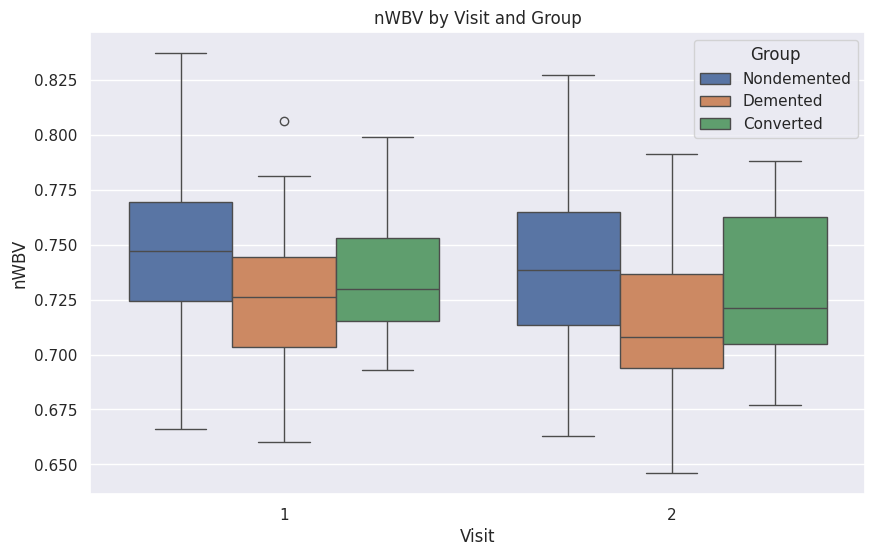

In [33]:
# Boxplot to demonstrate nWBV between visit and group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Visit', y='nWBV', hue='Group', data=df_mri)
plt.title('nWBV by Visit and Group')
plt.xlabel('Visit')
plt.ylabel('nWBV')
plt.show()

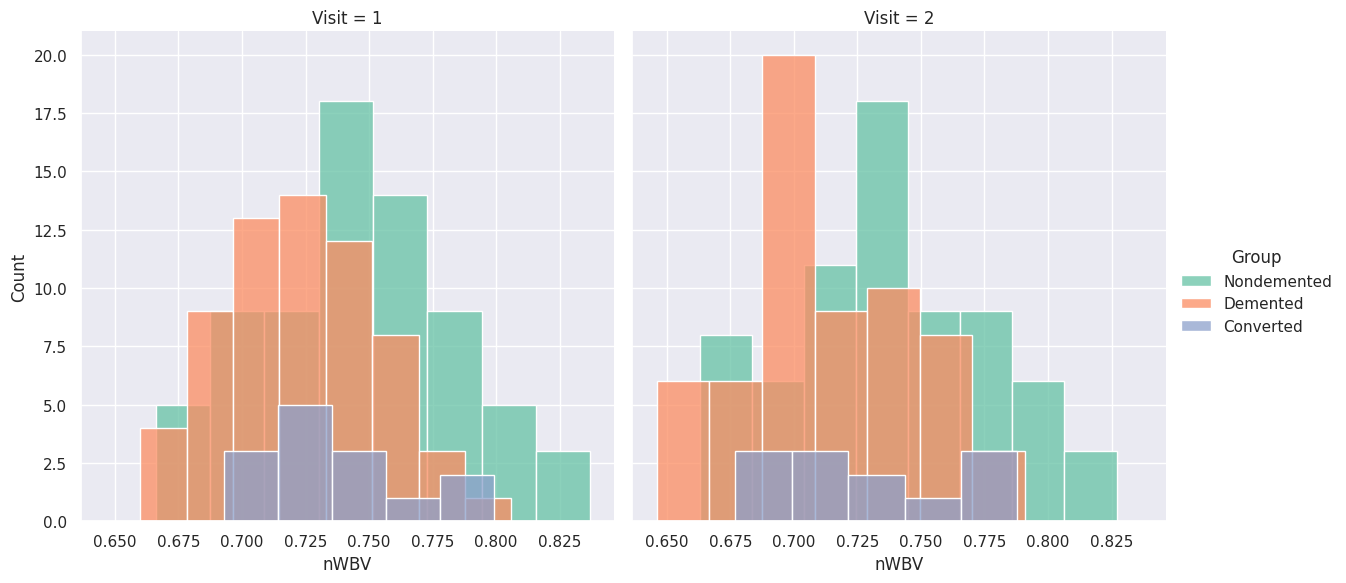

In [34]:
# Histograms to demonstrate nWBV between visits and group
plot = sns.FacetGrid(df_mri, col='Visit', hue='Group', palette='Set2', height=6)
plot.map(sns.histplot, 'nWBV')
plot.add_legend()
plt.show()

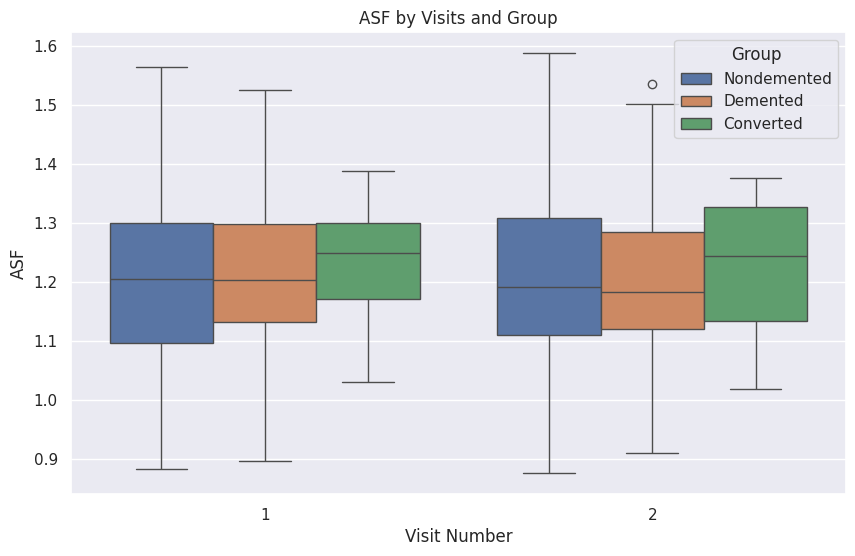

In [35]:
# Boxplot to demonstrate ASF between visits and group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Visit', y='ASF', hue='Group', data=df_mri)
plt.title('ASF by Visits and Group')
plt.xlabel('Visit Number')
plt.ylabel('ASF')
plt.show()

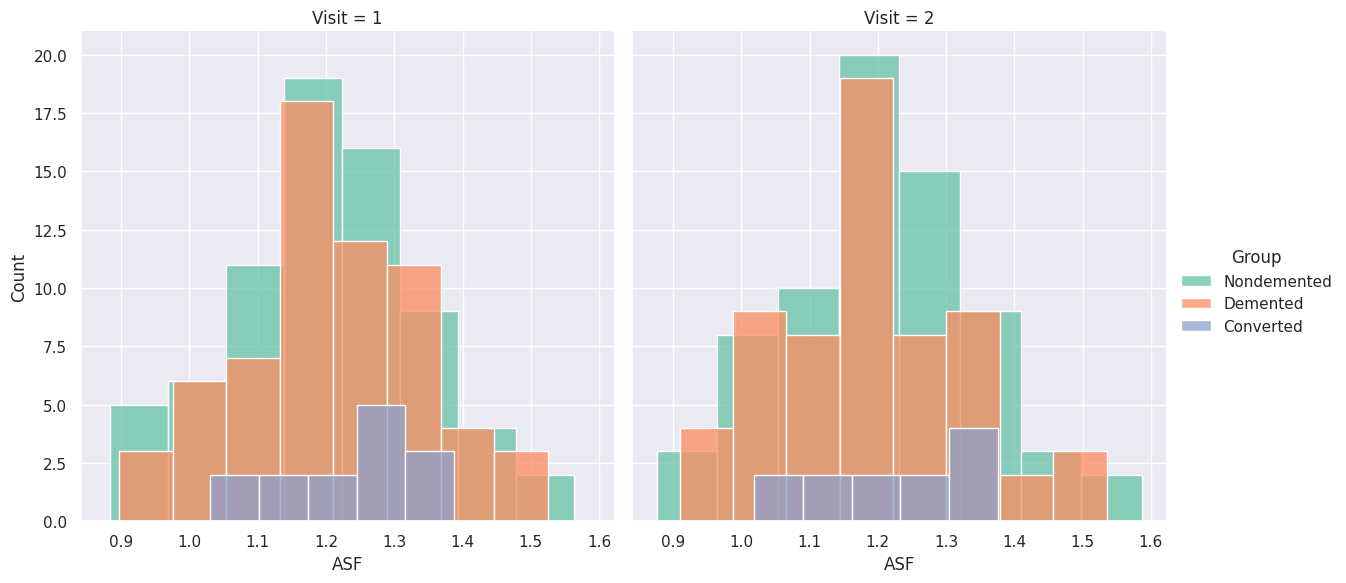

In [36]:
# Histograms to demonstrate ASF between visits and group
plot = sns.FacetGrid(df_mri, col='Visit', hue='Group', palette='Set2', height=6)
plot.map(sns.histplot, 'ASF')
plot.add_legend()
plt.show()

# Research Question 1: Does the Normalized Whole Brain Volume (nWBV) vary across different visits for each group (Demented, Nondemented and converted), and is there an interaction effect between visits and group status on nWBV changes?

<ipython-input-37-a65014ac0643>:3: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=df_mri, x='Visit', y='nWBV', hue='Group', dodge=True, markers=['o', 's','d'],


<Axes: xlabel='Visit', ylabel='nWBV'>

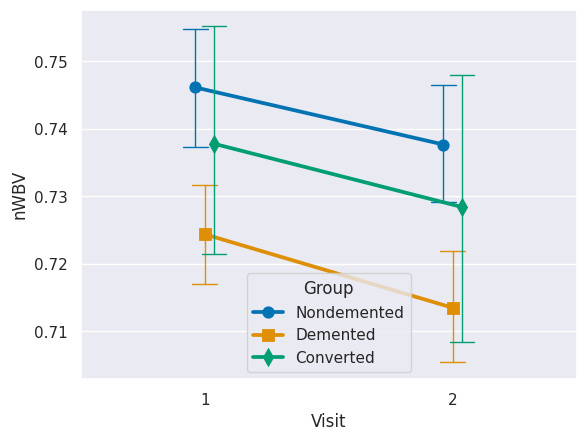

In [37]:
# Create the point plot to see nWBV between each group and visit
sns.set()
sns.pointplot(data=df_mri, x='Visit', y='nWBV', hue='Group', dodge=True, markers=['o', 's','d'],
	      capsize=.1, errwidth=1, palette='colorblind')

In [38]:
df_mri.groupby(['Visit', 'Group'])['nWBV'].agg(['mean', 'std']).round(2)

mean   std
Visit Group                  
1     Converted    0.74  0.03
      Demented     0.72  0.03
      Nondemented  0.75  0.04
2     Converted    0.73  0.04
      Demented     0.71  0.03
      Nondemented  0.74  0.04

In [39]:
# Compute the two-way mixed-design ANOVA
pg.mixed_anova(dv='nWBV', within='Visit', between='Group', subject='Subject ID', data=df_mri)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,0.033640,2,141,0.016820,6.712381,1.642113e-03,0.086934,NaN
1,Visit,0.006508,1,141,0.006508,94.251225,2.226896e-17,0.400641,1.0
2,Interaction,0.000212,2,141,0.000106,1.533508,2.193542e-01,0.021289,NaN


In [40]:
# Perform the post hoc tests
posthocs = pg.pairwise_ttests(dv='nWBV', within='Visit', between='Group',
                              subject='Subject ID', data=df_mri)
pg.print_table(posthocs)

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)



POST HOC TESTS

Contrast       Visit    A          B            Paired    Parametric         T      dof  alternative      p-unc                 BF10    hedges
-------------  -------  ---------  -----------  --------  ------------  ------  -------  -------------  -------  -------------------  --------
Visit          -        1          2            True      True           9.672  143.000  two-sided        0.000  225800000000000.000     0.255
Group          -        Converted  Demented     False     True           1.401   14.676  two-sided        0.182                0.668     0.469
Group          -        Converted  Nondemented  False     True          -0.648   15.832  two-sided        0.527                0.361    -0.188
Group          -        Demented   Nondemented  False     True          -3.690  129.436  two-sided        0.000               75.094    -0.633
Visit * Group  1        Converted  Demented     False     True           1.444   14.626  two-sided        0.170              

In [41]:
# Checking assumptions

# mauchly's test of spericity
pg.sphericity(data=df_mri, dv='nWBV', subject='Subject ID', within='Visit')[-1]

1.0

In [42]:
# test of normality
pg.normality(data=df_mri, dv='nWBV', group='Visit')

,W,pval,normal
Visit,,,
1,0.990075,0.372060,True
2,0.989654,0.366703,True


In [43]:
# test of homogeneity use Levene's test
pg.homoscedasticity(data=df_mri, dv='nWBV', group='Visit')

,W,pval,equal_var
levene,0.504444,0.478121,True


# Research Question 2: Does the Atlas Scaling Factor (ASF) vary across different visits for each group (Demented, Nondemented and converted), and is there an interaction effect between visits and group status on ASF changes?

<ipython-input-44-38b044f09b2a>:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=df_mri, x='Visit', y='ASF', hue='Group', dodge=True, markers=['o', 's', 'd'],


<Axes: xlabel='Visit', ylabel='ASF'>

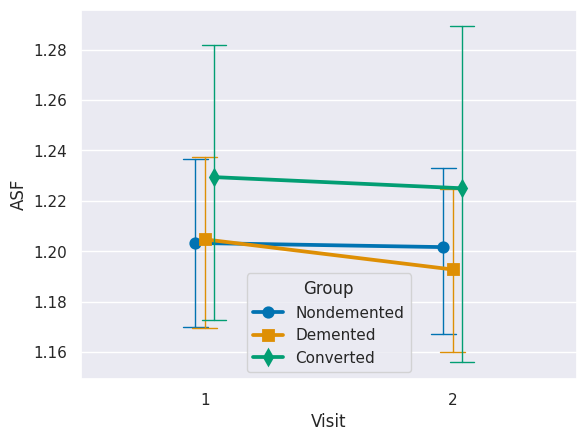

In [44]:
# Create the point plot to see ASF between each group and visit
sns.pointplot(data=df_mri, x='Visit', y='ASF', hue='Group', dodge=True, markers=['o', 's', 'd'],
	      capsize=.1, errwidth=1, palette='colorblind')

In [45]:
df_mri.groupby(['Visit', 'Group'])['ASF'].agg(['mean', 'std']).round(2)

mean   std
Visit Group                  
1     Converted    1.23  0.11
      Demented     1.20  0.14
      Nondemented  1.20  0.14
2     Converted    1.22  0.12
      Demented     1.19  0.14
      Nondemented  1.20  0.15

In [46]:
# Compute the two-way mixed-design ANOVA
pg.mixed_anova(dv='ASF', within='Visit', between='Group', subject='Subject ID', data=df_mri)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,0.018402,2,141,0.009201,0.233695,0.791909,0.003304,NaN
1,Visit,0.003160,1,141,0.003160,8.754326,0.003624,0.058458,1.0
2,Interaction,0.000742,2,141,0.000371,1.027595,0.360531,0.014366,NaN


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['SS'].plot(kind='hist', bins=20, title='SS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['DF1'].plot(kind='hist', bins=20, title='DF1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['MS'].plot(kind='hist', bins=20, title='MS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Source').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='SS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='SS', y='DF1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='DF1', y='MS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='MS', y='F', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['SS']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Source')):
  _plot_series(series, series_name, i)
  fig.legend(title='Source', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('SS')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['DF1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Source')):
  _plot_series(series, series_name, i)
  fig.legend(title='Source', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('DF1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['MS']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Source')):
  _plot_series(series, series_name, i)
  fig.legend(title='Source', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('MS')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['F']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Source')):
  _plot_series(series, series_name, i)
  fig.legend(title='Source', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('F')

from matplotlib import pyplot as plt
_df_13['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['SS'].plot(kind='line', figsize=(8, 4), title='SS')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['DF1'].plot(kind='line', figsize=(8, 4), title='DF1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['MS'].plot(kind='line', figsize=(8, 4), title='MS')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Source'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='index', y='Source', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Source'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='SS', y='Source', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Source'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='DF1', y='Source', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Source'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='MS', y='Source', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [47]:
# Perform the post hoc tests
posthocs = pg.pairwise_ttests(dv='ASF', within='Visit', between='Group',
                              subject='Subject ID', data=df_mri)
pg.print_table(posthocs)

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)



POST HOC TESTS

Contrast       Visit    A          B            Paired    Parametric         T      dof  alternative      p-unc    BF10    hedges
-------------  -------  ---------  -----------  --------  ------------  ------  -------  -------------  -------  ------  --------
Visit          -        1          2            True      True           2.958  143.000  two-sided        0.004   5.990     0.047
Group          -        Converted  Demented     False     True           0.781   17.188  two-sided        0.446   0.392     0.221
Group          -        Converted  Nondemented  False     True           0.639   17.093  two-sided        0.531   0.360     0.172
Group          -        Demented   Nondemented  False     True          -0.224  129.354  two-sided        0.823   0.191    -0.039
Visit * Group  1        Converted  Demented     False     True           0.737   17.480  two-sided        0.471   0.382     0.206
Visit * Group  1        Converted  Nondemented  False     True           

In [48]:
# Checking assumptions

# mauchly's test of spericity
pg.sphericity(data=df_mri, dv='ASF', subject='Subject ID', within='Visit')[-1]

1.0

In [49]:
# test of normality
pg.normality(data=df_mri, dv='ASF', group='Visit')

,W,pval,normal
Visit,,,
1,0.992676,0.641561,True
2,0.992931,0.698794,True


In [50]:
# test of homogeneity use Levene's test
pg.homoscedasticity(data=df_mri, dv='ASF', group='Visit')

,W,pval,equal_var
levene,0.125435,0.723468,True


In [51]:
from math import sqrt
from statsmodels.stats.power import TTestIndPower

# List parameters
effect_size = 0.7
alpha = 0.05
power = 0.91

# Perform power analysis to find sample size
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=1)
print('Sample size needed for each group: {:.3f}'.format(sample_size))

Sample size needed for each group: 45.451


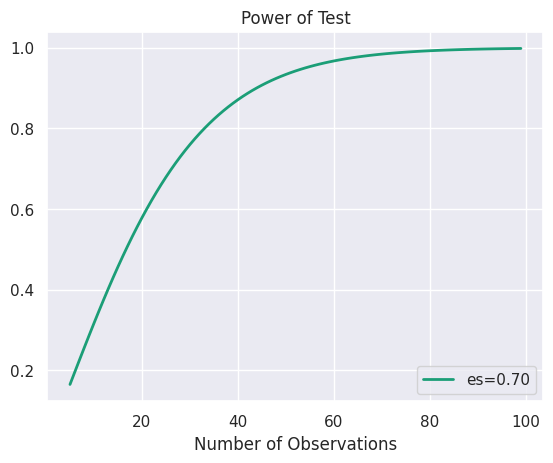

In [52]:
# Power curves
# power analysis parameters
effect_sizes = np.array([effect_size])
sample_sizes = np.array(range(5, 100))
# plot power curves
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,
			effect_size=effect_sizes)

plt.show()